## Analítica avanzada de datos con PySpark

En este notebook haremos recopilación de las funciones más habituales que se utilizan en el análisis y preprocesamiento de los datos

In [1]:
import findspark
findspark.init()

import pandas as pd
import pyspark

In [2]:
from pyspark.sql import functions as f
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Inicio de las sesión de Spark

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master('local[*]')\
        .appName('Pyspark_Tutorial')\
        .getOrCreate()

## 1.- Lectura de los datos

In [6]:
#Before changing schema

b_data = spark.read.csv(
        'C:/Users/brjmr/Desktop/cursos/data/stocks_price_final.csv',
        sep =',',
        header = True)

b_data.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: string (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



### Cambiar la estructura de los datos

In [7]:
from pyspark.sql.types import *

data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields=data_schema)

In [9]:
data = spark.read.csv(
        'C:/Users/brjmr/Desktop/cursos/data/stocks_price_final.csv',
        sep= ',',
        header = True,
        schema = final_struc)

In [10]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [11]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [12]:
data = data.withColumnRenamed('market.cap', 'market_cap')

## 2.-  Inspeccionar los datos

* schema()
* dtypes
* head()
* show()
* first()
* take(n)
* describe()
* columns
* count()
* distinct()
* printSchema()

In [13]:
# Print Schema of the data
data.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(symbol,StringType,true),StructField(data,DateType,true),StructField(open,DoubleType,true),StructField(high,DoubleType,true),StructField(low,DoubleType,true),StructField(close,DoubleType,true),StructField(volume,IntegerType,true),StructField(adjusted,DoubleType,true),StructField(market_cap,StringType,true),StructField(sector,StringType,true),StructField(industry,StringType,true),StructField(exchange,StringType,true)))

In [14]:
data.dtypes

[('_c0', 'int'),
 ('symbol', 'string'),
 ('data', 'date'),
 ('open', 'double'),
 ('high', 'double'),
 ('low', 'double'),
 ('close', 'double'),
 ('volume', 'int'),
 ('adjusted', 'double'),
 ('market_cap', 'string'),
 ('sector', 'string'),
 ('industry', 'string'),
 ('exchange', 'string')]

In [15]:
data.head(3)

[Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=2, symbol='TXG', data=datetime.date(2019, 9, 13), open=52.75, high=54.355, low=49.150002, close=52.27, volume=1025200, adjusted=52.27, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ'),
 Row(_c0=3, symbol='TXG', data=datetime.date(2019, 9, 16), open=52.450001, high=56.0, low=52.009998, close=55.200001, volume=269900, adjusted=55.200001, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')]

In [16]:
data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|
|  5|   TXG|2019-09-18|56.849998|    62.2

In [17]:
data.first()

Row(_c0=1, symbol='TXG', data=datetime.date(2019, 9, 12), open=54.0, high=58.0, low=51.0, close=52.75, volume=7326300, adjusted=52.75, market_cap='$9.31B', sector='Capital Goods', industry='Biotechnology: Laboratory Analytical Instruments', exchange='NASDAQ')

In [18]:
data.describe().show()

+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|summary|              _c0| symbol|              open|              high|               low|             close|            volume|         adjusted|market_cap|          sector|            industry|exchange|
+-------+-----------------+-------+------------------+------------------+------------------+------------------+------------------+-----------------+----------+----------------+--------------------+--------+
|  count|          1729034|1729034|           1726301|           1726301|           1726301|           1726301|           1725207|          1726301|   1729034|         1729034|             1729034| 1729034|
|   mean|         864517.5|   null|15070.071703341047|15555.067268137085|14557.808227578987| 15032.71485433071|1397692.1627885813| 14926.1096887955|      null|            n

In [19]:
data.columns

['_c0',
 'symbol',
 'data',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market_cap',
 'sector',
 'industry',
 'exchange']

In [21]:

data.count()

1729034

In [22]:
data.distinct().count()

1729034

In [23]:
data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- data: date (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: integer (nullable = true)
 |-- adjusted: double (nullable = true)
 |-- market_cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



## 3. Transformación de columnas
* Añadir columnas
* Modificar columnas existentes
* Eliminar columnas

In [24]:
data = data.withColumn('date', data.data)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|      date|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [25]:
data = data.withColumnRenamed('date', 'data_changed')

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|     open|     high|      low|    close| volume| adjusted|market_cap|       sector|            industry|exchange|data_changed|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+------------+
|  1|   TXG|2019-09-12|     54.0|     58.0|     51.0|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-13|
|  3|   TXG|2019-09-16|52.450001|     56.0|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital 

## 4.- Imputando datos faltantes

In [27]:
# Remove Rows with Missing Values
data.na.drop()

#Replacing Missing Values with Mean
data.na.fill(data.select(f.mean(data['open'])).collect()[0][0])

# Replacing Missing Values with new values
# data.na.replace(old_value, new_value)

DataFrame[_c0: int, symbol: string, data: date, open: double, high: double, low: double, close: double, volume: int, adjusted: double, market_cap: string, sector: string, industry: string, exchange: string, data_changed: date]

## 5. Selección de datos con PySpark SQL
* Select
* Filter
* Between
* When
* Like
* GroupBy
* Aggregations

#### Select

In [28]:
data.select(['open', 'high', 'low', 'close', 'volume', 'adjusted']).describe().show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|              open|              high|               low|             close|            volume|         adjusted|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+
|  count|           1726301|           1726301|           1726301|           1726301|           1725207|          1726301|
|   mean|15070.071703341047|15555.067268137085|14557.808227578987| 15032.71485433071|1397692.1627885813| 14926.1096887955|
| stddev|1111821.8002863186|1148247.1953514975|1072968.1558434179|1109755.9294000594| 5187522.908169097|1101877.632894013|
|    min|             0.072|             0.078|             0.052|             0.071|                 0|        -1.230099|
|    max|      1.60168176E8|      1.61601456E8|      1.55151728E8|      1.58376592E8|         656504200|     1.57249392E8|
+-------+-------

#### filter

In [29]:
from pyspark.sql.functions import col, lit

data.filter((col('data') >= lit('2020-01-01'))
           & (col('data') <= lit('2020-01-31'))).show()

+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+------------+
|_c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|data_changed|
+---+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+------------+
| 78|   TXG|2020-01-02| 76.910004| 77.989998| 71.480003| 72.830002|220200| 72.830002|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-02|
| 79|   TXG|2020-01-03| 71.519997| 76.188004| 70.580002| 75.559998|288300| 75.559998|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-03|
| 80|   TXG|2020-01-06| 75.269997| 77.349998| 73.559998| 75.550003|220600| 75.550003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-06|
| 81|   TXG|2020-01-07|      76.0| 77.279999|     75.32| 75.980003|182400| 7

#### between

In [30]:
data.filter(data.adjusted.between(100.0, 500.0)).show(5)

+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+------------+
| _c0|symbol|      data|      open|      high|       low|     close|volume|  adjusted|market_cap|       sector|            industry|exchange|data_changed|
+----+------+----------+----------+----------+----------+----------+------+----------+----------+-------------+--------------------+--------+------------+
|  93|   TXG|2020-01-24| 95.459999|     101.0| 94.157997|100.790001|328100|100.790001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-24|
|  94|   TXG|2020-01-27| 99.760002|104.892998| 97.019997|103.209999|334900|103.209999|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-27|
|  95|   TXG|2020-01-28|104.620003|108.269997|103.297997|106.620003|245400|106.620003|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|  2020-01-28|
|6893|  ABMD|2019-01-02|315.940002|320.709991|307.029999|309.959991|59

### when

In [31]:
data.select('open', 'close',
           f.when(data.adjusted >= 200.0, 1).otherwise(0)).show(5)

+---------+---------+-----------------------------------------------+
|     open|    close|CASE WHEN (adjusted >= 200.0) THEN 1 ELSE 0 END|
+---------+---------+-----------------------------------------------+
|     54.0|    52.75|                                              0|
|    52.75|    52.27|                                              0|
|52.450001|55.200001|                                              0|
|56.209999|56.779999|                                              0|
|56.849998|     62.0|                                              0|
+---------+---------+-----------------------------------------------+
only showing top 5 rows



#### like

In [32]:
data.select('sector',
           data.sector.rlike('^[B,C]').alias('Sector Starting with B or C')).distinct().show()

+--------------------+---------------------------+
|              sector|Sector Starting with B or C|
+--------------------+---------------------------+
|         Health Care|                      false|
|       Capital Goods|                       true|
|Consumer Non-Dura...|                       true|
|    Public Utilities|                      false|
|   Consumer Durables|                       true|
|             Finance|                      false|
|      Transportation|                      false|
|       Miscellaneous|                      false|
|   Consumer Services|                       true|
|              Energy|                      false|
|    Basic Industries|                       true|
|          Technology|                      false|
+--------------------+---------------------------+



#### groupBy

In [33]:
data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().show()

+--------------------+------------------+------------------+------------------+
|            industry|         avg(open)|        avg(close)|     avg(adjusted)|
+--------------------+------------------+------------------+------------------+
|Finance/Investors...| 5.134401785714288| 5.136630739795919| 4.991354066964286|
|       Miscellaneous| 16.38588266938775|16.359879090306126|16.148959322959186|
|Investment Banker...| 58.95058094575025| 58.98308596082618| 58.15783725890315|
|   Food Distributors| 43.27450856935453| 43.27317810574848| 42.91047608357857|
|Miscellaneous man...|15.660586409948975|15.650934860969384|15.369818847193866|
|    Ophthalmic Goods|108.50137892138575| 108.5404598760826|108.52516121052633|
|        Broadcasting| 24.91678746482516|24.917388455395148|24.699102029625312|
|Agricultural Chem...|  22.0464139289966|22.042051076318035| 21.63509341815477|
|Biotechnology: Bi...| 24.80808319232425|24.803587149935485|24.745079978273242|
|Other Specialty S...|  84.8071881056286

#### agregation

In [34]:
from pyspark.sql.functions import col, min, max, avg, lit

data.groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-07-22|0.147          |1059.98999     |52.03839496900667 |0.1361         |1035.829956    |52.06362854950963 |0.1361                  |1035.829956             |51.80973033632302       |
|Health Care          |2019-01-02|2020-07-22|0.072          |186000.0       |119.96763306523248|0.071       

Obtenga los datos mínimos, maximos y promedio de los sectores de **enero de 2019** a **enero de 2020**

In [35]:
data.filter( (col('data') >= lit('2019-01-02')) & (col('data') <= lit('2020-01-31')) )\
    .groupBy("sector") \
    .agg(min("data").alias("From"), 
         max("data").alias("To"), 
         
         min("open").alias("Minimum Opening"),
         max("open").alias("Maximum Opening"), 
         avg("open").alias("Average Opening"), 

         min("close").alias("Minimum Closing"), 
         max("close").alias("Maximum Closing"), 
         avg("close").alias("Average Closing"), 

         min("adjusted").alias("Minimum Adjusted Closing"), 
         max("adjusted").alias("Maximum Adjusted Closing"), 
         avg("adjusted").alias("Average Adjusted Closing"), 

      ).show(truncate=False)

+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|sector               |From      |To        |Minimum Opening|Maximum Opening|Average Opening   |Minimum Closing|Maximum Closing|Average Closing   |Minimum Adjusted Closing|Maximum Adjusted Closing|Average Adjusted Closing|
+---------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+------------------------+------------------------+------------------------+
|Miscellaneous        |2019-01-02|2020-01-31|0.16           |690.0          |51.51619596530089 |0.16           |691.099976     |51.549534122690304|0.16                    |691.099976              |51.21050733851888       |
|Health Care          |2019-01-02|2020-01-31|0.072          |186000.0       |146.7756197567625 |0.071       

### 6.- Visualización de datos

In [37]:
sec_df = data.select(['sector','open','close','adjusted']).groupBy('sector').mean().toPandas()

In [38]:
sec_df

,sector,avg(open),avg(close),avg(adjusted)
0,Miscellaneous,52.038395,52.063629,51.809730
1,Health Care,119.967633,119.078061,118.973948
2,Public Utilities,35.580777,35.585282,34.730156
3,Energy,24.456590,24.427350,23.684714
4,Consumer Non-Durables,43.328603,43.330386,42.817625
5,Finance,37.774667,37.779002,37.100285
6,Basic Industries,266410.354701,265750.361367,263865.510703
7,Capital Goods,60.488544,60.516555,59.975123
8,Technology,49.516045,49.534799,49.252340
9,Consumer Services,55.078867,55.055248,54.361878


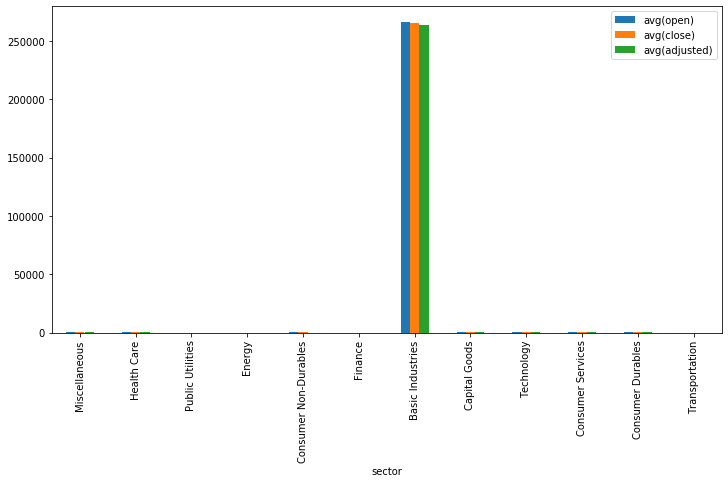

In [39]:
sec_df.plot(kind='bar', x='sector', y = sec_df.columns.tolist()[1:], figsize = (12, 6))

Elimine algunas de las industrias básicas y véala de nuevo

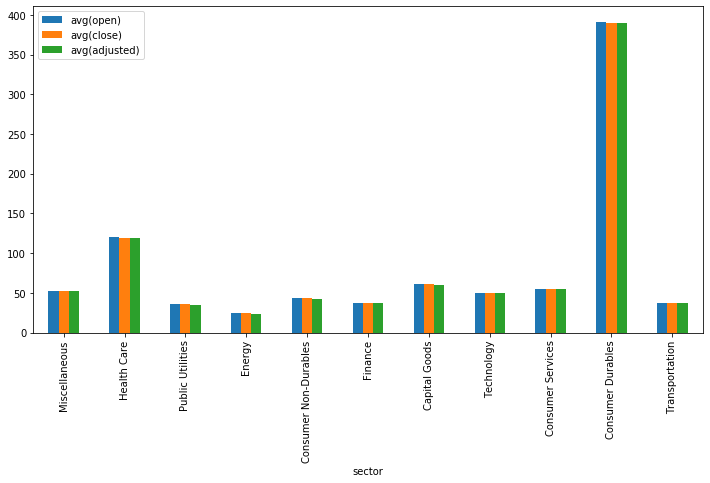

In [42]:
ind = list(range(12))
ind.pop(6)
sec_df.iloc[ind ,:].plot(kind = 'bar', x='sector', y = sec_df.columns.tolist()[1:], figsize=(12, 6))
plt.show()

In [43]:
industries_x = data.select(['industry', 'open', 'close', 'adjusted']).groupBy('industry').mean().toPandas()
industries_x.head()

,industry,avg(open),avg(close),avg(adjusted)
0,Finance/Investors Services,5.134402,5.136631,4.991354
1,Miscellaneous,16.385883,16.359879,16.148959
2,Investment Bankers/Brokers/Service,58.950581,58.983086,58.157837
3,Food Distributors,43.274509,43.273178,42.910476
4,Miscellaneous manufacturing industries,15.660586,15.650935,15.369819


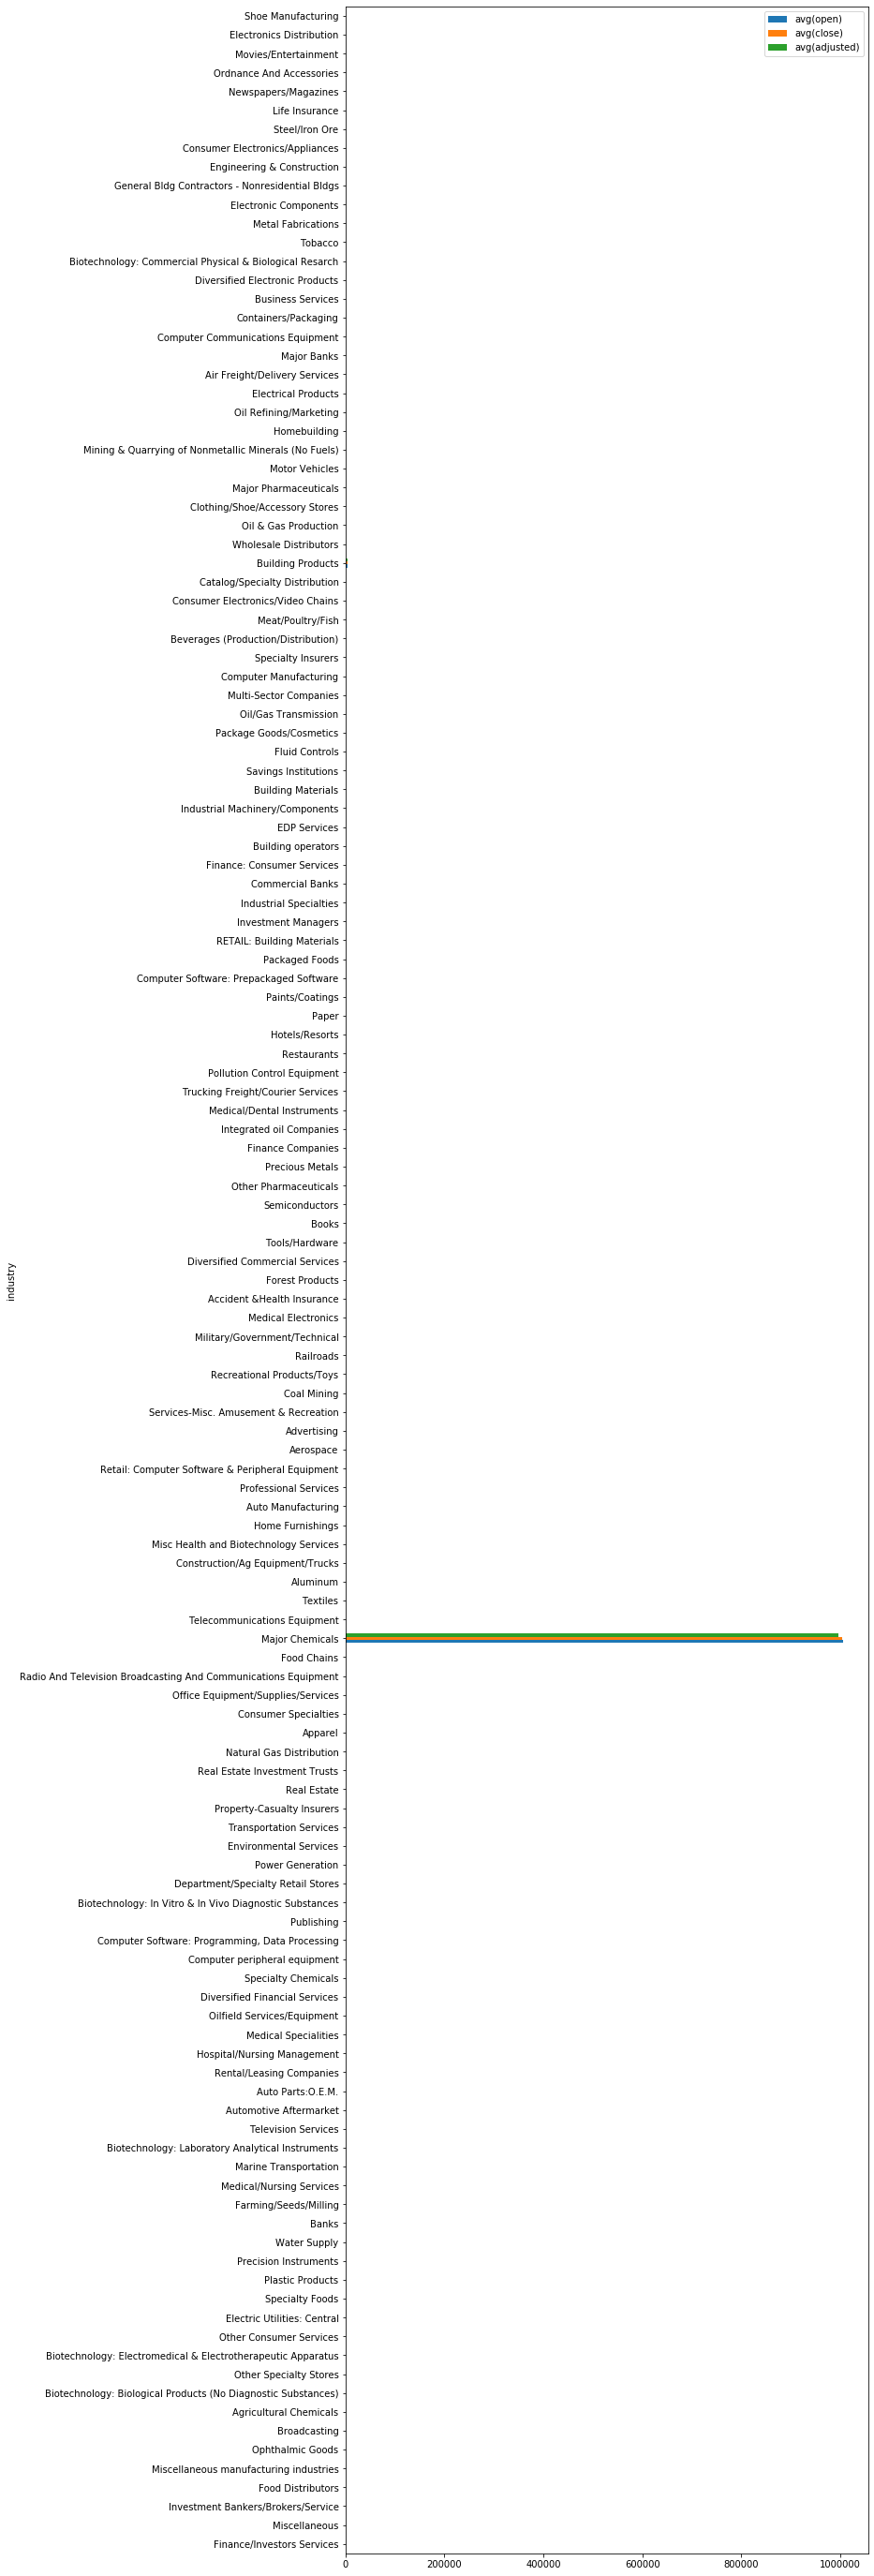

In [44]:
industries_x.plot(kind= 'barh', x= 'industry',
                 y = industries_x.columns.tolist()[1:], figsize=(10, 50))

Elimine **sustancias químicas importantes y productos de construcción** para ver los datos con claridad

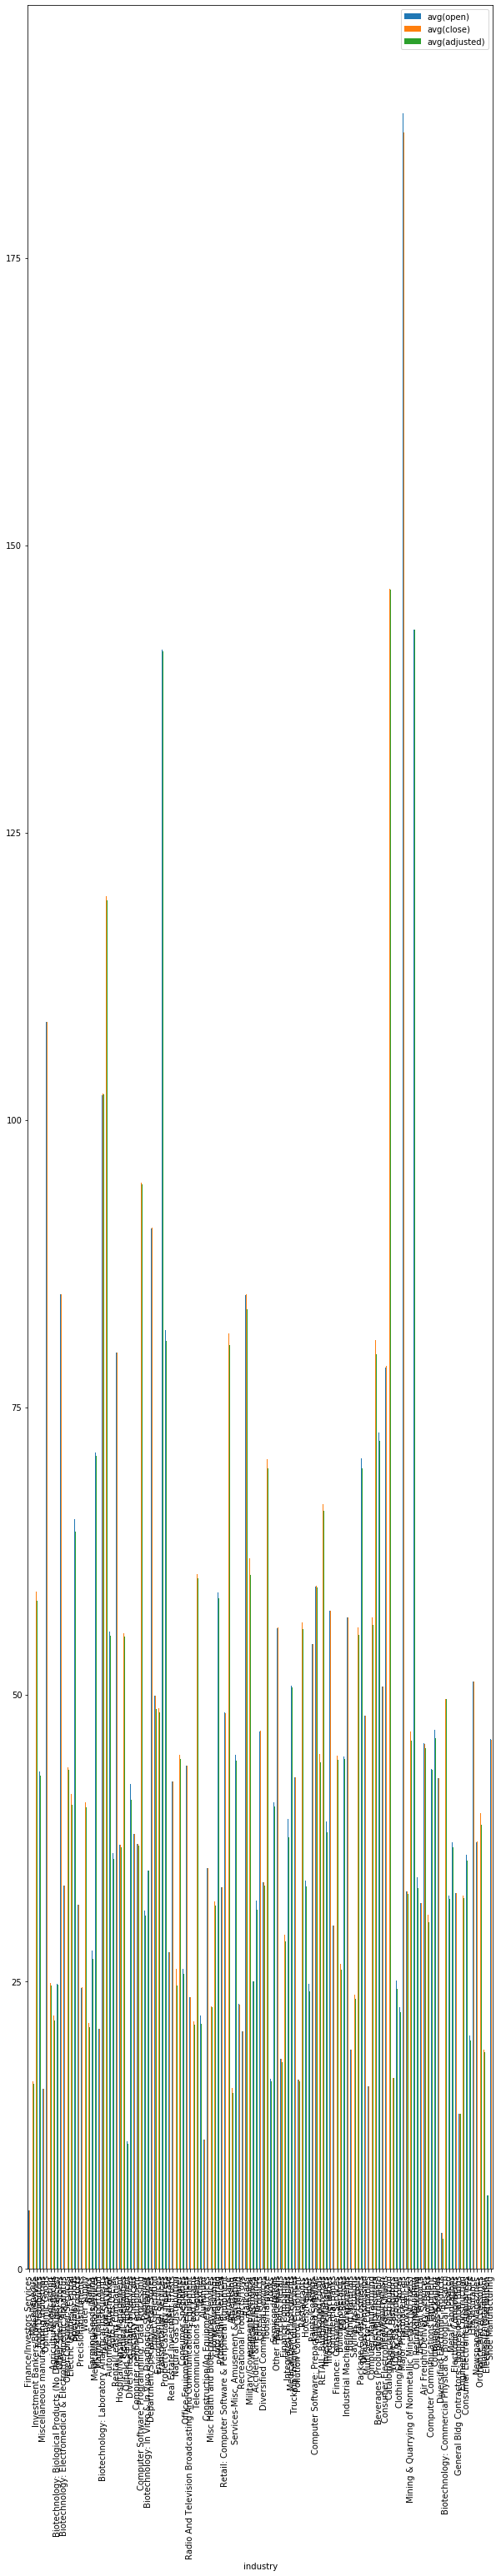

In [47]:
q = industries_x[(industries_x.industry != 'Major Chemicals') & (industries_x.industry != 'Building Products')]
q.plot(kind='bar', x='industry', y= q.columns.tolist()[1:], figsize=(10,50))
plt.show()

In [48]:
tech = data.where(col('sector') == 'Technology').select('data', 'open', 'close', 'adjusted')
tech.show()

+----------+----+-----+--------+
|      data|open|close|adjusted|
+----------+----+-----+--------+
|2019-01-02|8.51| 8.55|    8.55|
|2019-01-03| 8.5| 8.59|    8.59|
|2019-01-04|8.72| 8.88|    8.88|
|2019-01-07|8.88| 8.86|    8.86|
|2019-01-08|8.93|  9.4|     9.4|
|2019-01-09|9.46| 9.43|    9.43|
|2019-01-10|9.41|  9.4|     9.4|
|2019-01-11|9.37| 9.51|    9.51|
|2019-01-14|9.45| 9.48|    9.48|
|2019-01-15| 9.5| 9.52|    9.52|
|2019-01-16|9.53| 9.52|    9.52|
|2019-01-17|9.22|  9.5|     9.5|
|2019-01-18|9.57| 9.41|    9.41|
|2019-01-22|9.31|  8.9|     8.9|
|2019-01-23|8.93| 8.83|    8.83|
|2019-01-24|8.84| 8.73|    8.73|
|2019-01-25| 8.8| 8.93|    8.93|
|2019-01-28|8.87| 8.83|    8.83|
|2019-01-29|8.82| 8.83|    8.83|
|2019-01-30| 8.9| 8.74|    8.74|
+----------+----+-----+--------+
only showing top 20 rows



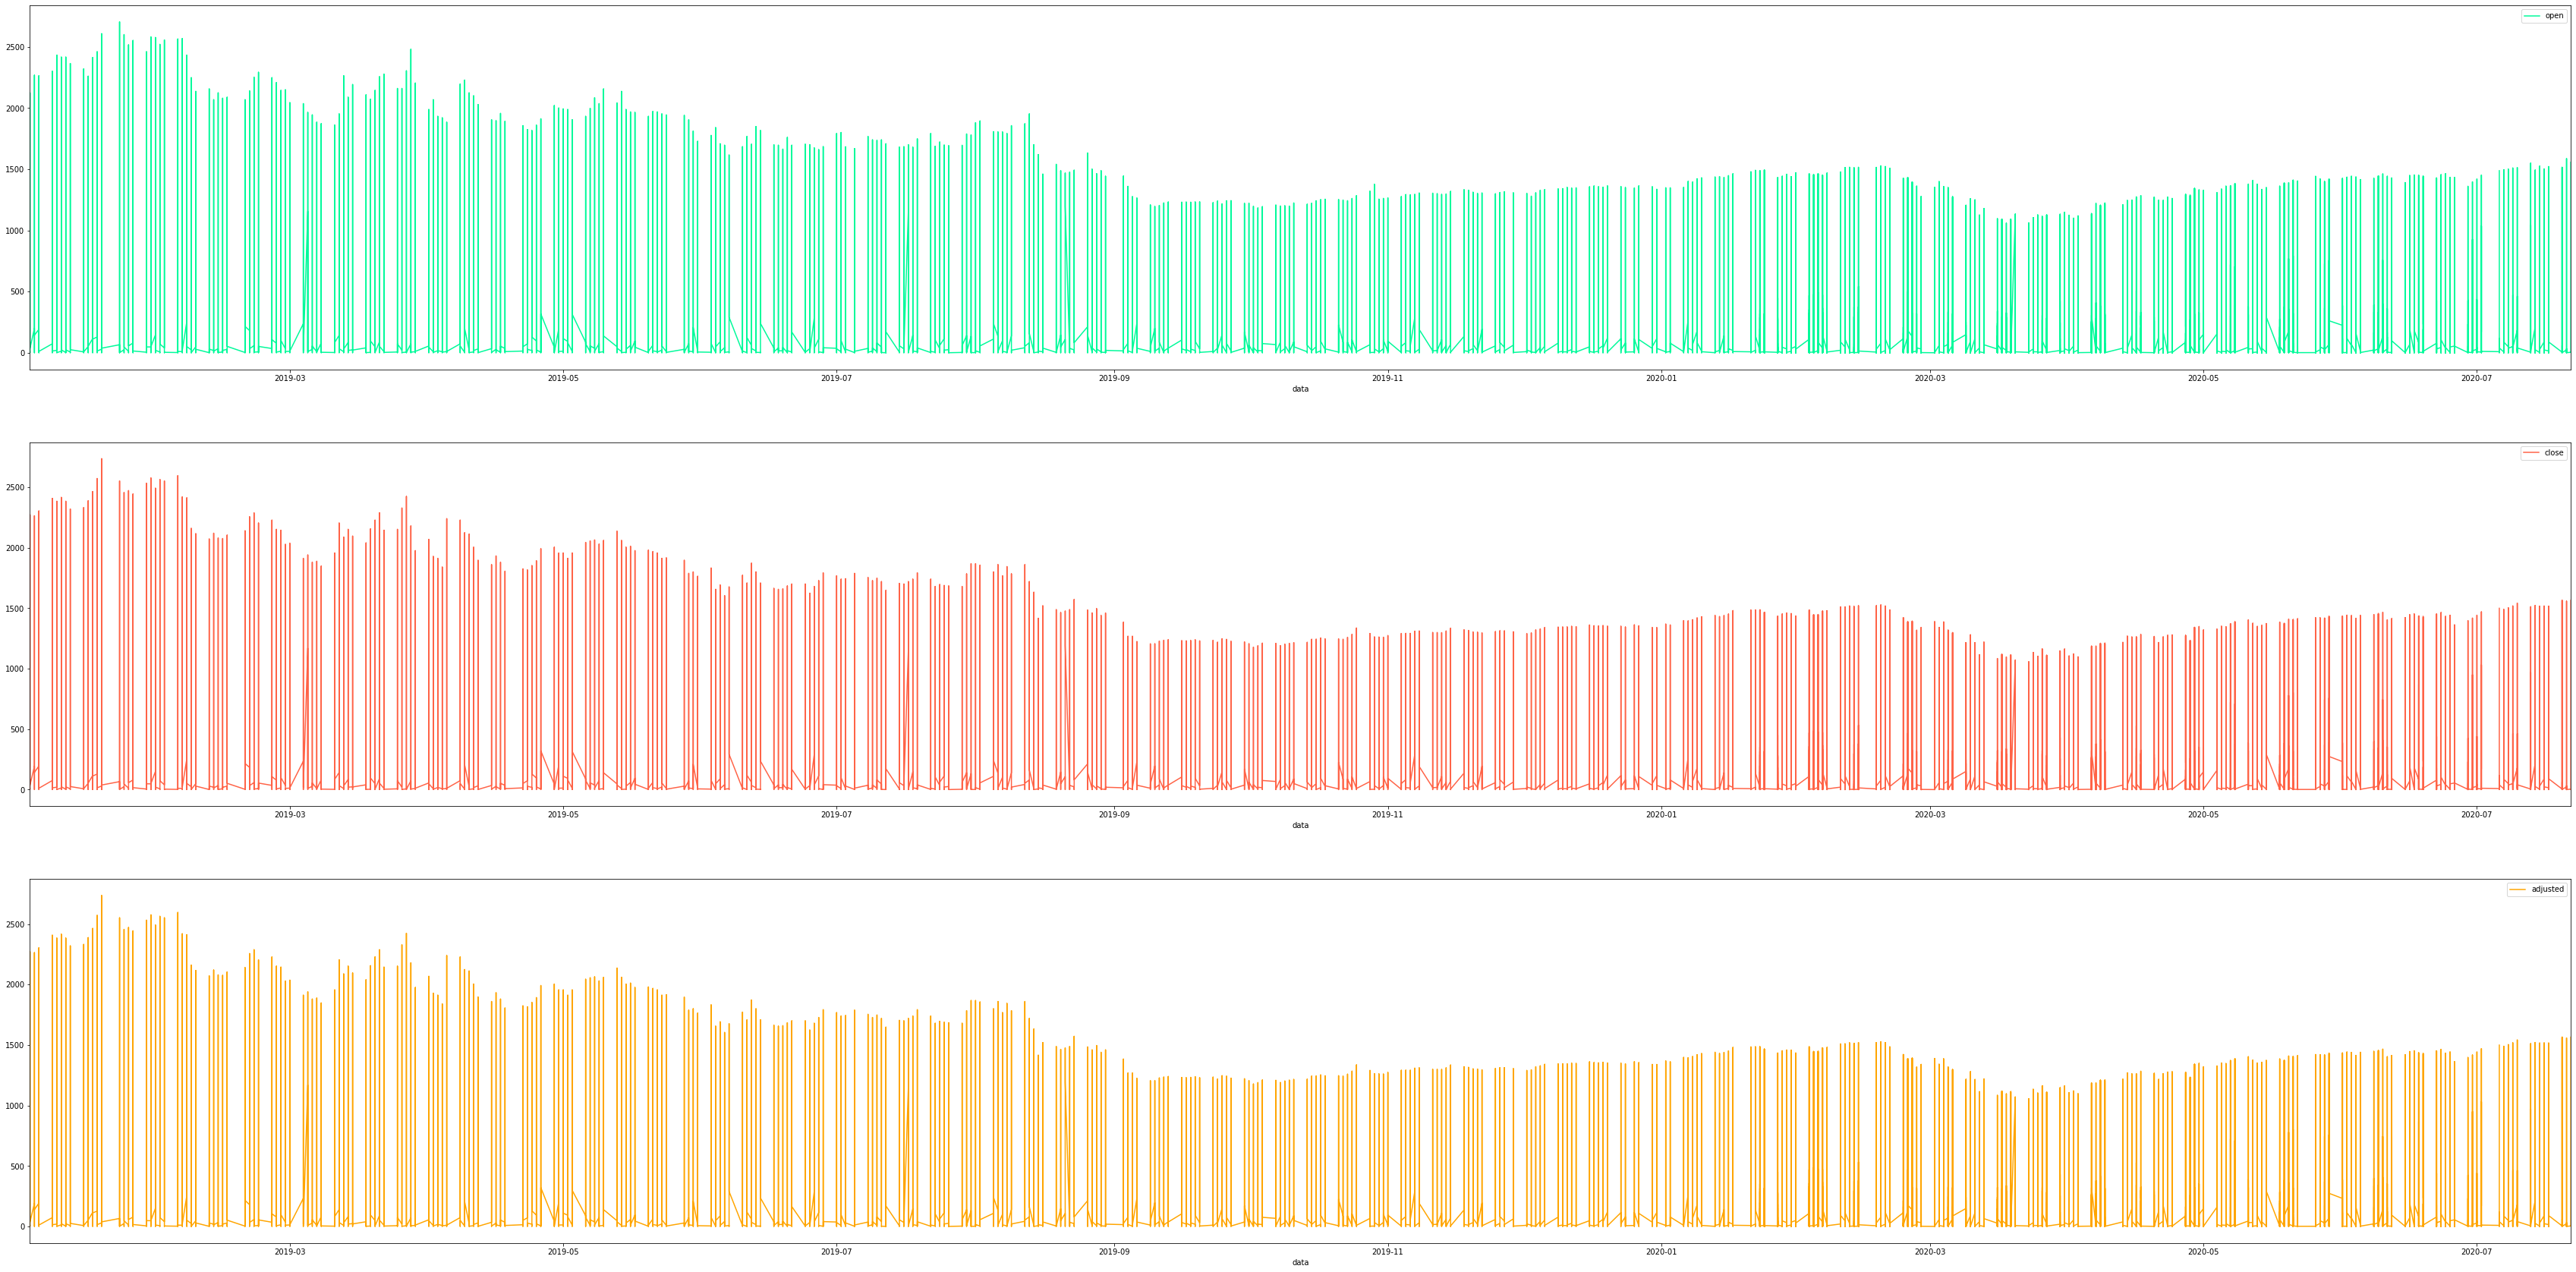

In [50]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize =(60, 30))

tech.toPandas().plot(kind = 'line', x = 'data', y='open',ax = axes[0], color = 'mediumspringgreen')

tech.toPandas().plot(kind = 'line', x = 'data', y='close', ax = axes[1], color = 'tomato')

tech.toPandas().plot(kind = 'line', x = 'data', y='adjusted', ax = axes[2], color = 'orange')

plt.show()

### 7.- Leer y guardar los datos en archivos

In [51]:
## Writing entire data to different file formats

# CSV
data.write.csv('dataset.csv')

# JSON
data.write.save('dataset.json', format='json')

# Parquet
data.write.save('dataset.parquet', format='parquet')

## Writing selected data to different file formats

# CSV
data.select(['data', 'open', 'close', 'adjusted'])\
            .write.csv('dataset.csv')

# JSON
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.json', format='json')

# Parquet
data.select(['data', 'open', 'close', 'adjusted'])\
    .write.save('dataset.parquet', format='parquet')

AnalysisException: path file:/C:/Users/brjmr/Desktop/Cursos/PySpark/Analítica de datos con PySpark/dataset.csv already exists.;